<h2>Implement my very simple NN in Nielsen's code - SR Nov21</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import network
net = network.Network([2,4,1])

We need 2 input neurons (x,y), four work horses and one output neuron. Let us visualise the random initial state of the network.

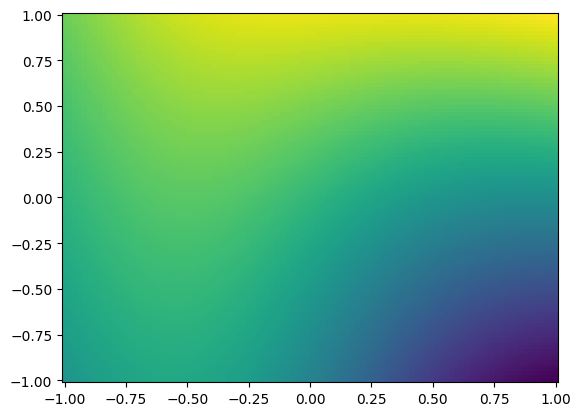

In [3]:
nbins=100
xi, yi = np.mgrid[-1:1:nbins*1j, -1:1:nbins*1j]
zi = net.feedforward(np.vstack([xi.flatten(), yi.flatten()]))

plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.show()

In [4]:
net.biases,net.weights

([array([[-1.20678912],
         [ 1.42816831],
         [ 1.50491653],
         [ 0.34178269]]),
  array([[-1.08874116]])],
 [array([[ 0.38693977, -0.47806745],
         [-1.41339982, -0.78799493],
         [ 1.8270565 ,  0.06945354],
         [ 1.49852076,  0.22356409]]),
  array([[-0.42679616, -0.41805754,  0.60059406, -0.77706244]])])

Although the training data is expected as a list of tuples ([[x],[y]],[[sign]]), the feedforward routine itself wants [[x1,x2,x3],[y1,y2,y3]].

In [5]:
net.feedforward([[-.2,.2,.3],[.3,.3,.2]])

array([[0.18786749, 0.185585  , 0.18390071]])

In [6]:
# training = [];
# for d in range(0,100):
#     x=2*np.random.random()-1
#     y=2*np.random.random()-1
#     training.append((np.array([[x],[y]]),np.array([[1/2+np.sign(x*y)/2]])));

It is better to first define x and y as arrays of coordinates, this way I can also plot the points easily.

In [7]:
n = 100;
x = 2*np.random.random(n)-1
y = 2*np.random.random(n)-1
training = [];
for i in range(0,n):
    training.append((np.array([[x[i]],[y[i]]]),np.array([[1/2+np.sign(x[i]*y[i])/2]])));

In [8]:
training[:5]

[(array([[-0.81748834],
         [ 0.52139781]]),
  array([[0.]])),
 (array([[-0.78775087],
         [-0.30181768]]),
  array([[1.]])),
 (array([[-0.13617704],
         [-0.74966597]]),
  array([[1.]])),
 (array([[ 0.09898303],
         [-0.16006494]]),
  array([[0.]])),
 (array([[ 0.36403526],
         [-0.56657554]]),
  array([[0.]]))]

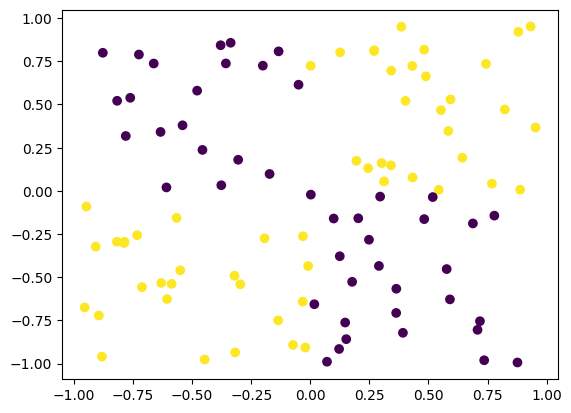

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x,y, c=np.sign(x*y))
plt.show()

Now, train the network. We need a surprisingly large number of epochs.

In [10]:
%%capture
net.SGD(training, 1000, 25, 3.0)

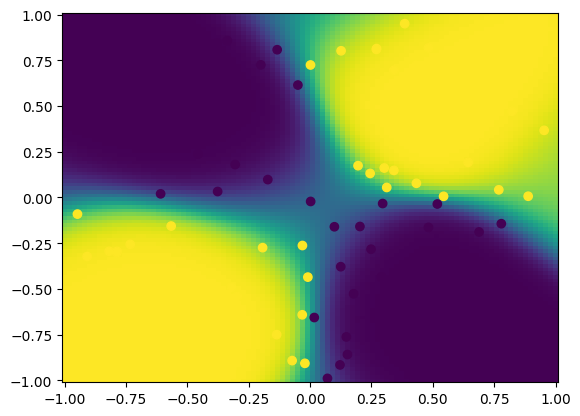

In [11]:
nbins=100
xi, yi = np.mgrid[-1:1:nbins*1j, -1:1:nbins*1j]
zi = net.feedforward(np.vstack([xi.flatten(), yi.flatten()]))

plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.scatter(x,y,c=np.sign(x*y))
plt.show()